# Proyecto: Predicción del Rendimiento Académico de Estudiantes

--- 

## Objetivo del Proyecto

Desarrollar un modelo predictivo que estime las notas finales de los estudiantes utilizando datos como horas de estudio, asistencia y participación en clase. Aplicaremos técnicas de ciencia de datos para analizar el "Student Performance Dataset" y utilizaremos modelos de regresión lineal y árboles de decisión.

https://archive.ics.uci.edu/dataset/320/student+performance

# Información del conjunto de datos

Este estudio analiza el rendimiento de los estudiantes en la educación secundaria de dos escuelas portuguesas. Los atributos de los datos incluyen calificaciones de los estudiantes, características demográficas, sociales y relacionadas con la escuela) y se recopilaron mediante informes escolares y cuestionarios. Se proporcionan dos conjuntos de datos sobre el rendimiento en dos materias distintas: matemáticas (mat) y lengua portuguesa (por). En [Cortez y Silva, 2008], los dos conjuntos de datos se modelaron bajo tareas de clasificación y regresión binarias/de cinco niveles. Nota importante: el atributo objetivo G3 tiene una fuerte correlación con los atributos G2 y G1. Esto ocurre porque G3 es la calificación del último año (emitida en el tercer período), mientras que G1 y G2 corresponden a las calificaciones del primer y segundo período. Es más difícil predecir G3 sin G2 y G1, pero dicha predicción es mucho más útil.

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn jupyter xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Importación de Bibliotecas y Carga de Datos

---

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar las visualizaciones
%matplotlib inline
sns.set(style='whitegrid', palette='deep')

# Cargar los datos
data_mat = pd.read_csv('../data/student-mat.csv', sep=';')
data_por = pd.read_csv('../data/student-por.csv', sep=';')

# Combinar los datasets si es necesario
data = pd.concat([data_mat, data_por], ignore_index=True)

# 2. Análisis Exploratorio de Datos (EDA)

---
## 2.1. Exploración Inicial

### 2.1.1. Visualizar las primeras filas del conjunto de datos
Vamos a ver las primeras filas para tener una idea general de cómo están organizados los datos.


In [3]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


***Explicación:***

`data.head()` muestra las primeras 5 filas del DataFrame `data`. Se puede pasar un número dentro de los paréntesis para mostrar más o menos filas, por ejemplo, `data.head(10)`.

***Resultado esperado:***

Muestra una tabla con las primeras filas y todas las columnas, lo que te permitirá ver los nombres de las columnas y algunos valores de ejemplo.

### 2.1.2. Obtener información general del conjunto de datos


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

***Explicación:***

`data.info()` proporciona información sobre el número de entradas (filas), el número de columnas, los nombres de las columnas, el tipo de datos de cada columna y el número de valores no nulos.

***Resultado esperado:***

Se verá una salida que indica cuántas filas y columnas hay, y para cada columna, su nombre, cuántos valores no nulos tiene y su tipo de datos.

### 2.1.3. Obtener estadísticas descriptivas

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


***Explicación:***

`data.describe()` muestra estadísticas como la media, desviación estándar, valores mínimos, máximos y cuartiles para las columnas numéricas.

***Resultado esperado:***

Una tabla con estadísticas descriptivas de las columnas numéricas.

***Análisis:***

Al revisar las estadísticas descriptivas:

- ***Edad (`age):*** Varía de 15 a 22 años, con una media de aproximadamente 16.7 años.
- ***Ausencias (`absences):*** Varían de 0 a 385, con una media de 5.86. El valor máximo de 385 es significativamente más alto que el percentil 75 (8 ausencias), lo que indica la presencia de outliers.

***Notas:***
- ***G1*** (nota primer periodo): Media de 11.4, rango de 0 a 20.
- ***G2*** (nota segundo periodo): Media de 11.5, rango de 0 a 20.
- ***G3*** (nota final): Media de 11.3, rango de 0 a 20.

Observamos que las notas tienen una distribución similar y que algunos estudiantes tienen notas muy bajas (0), lo que podría indicar que abandonaron o reprobaron.

## 2.2. Comprobación de Valores Nulos
Es importante verificar si hay valores faltantes en el conjunto de datos.

In [6]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

***Explicación:***

- `data.isnull()` devuelve un DataFrame del mismo tamaño que `data`, con valores `True` donde hay valores nulos y `False donde no los hay.
- `sum()` suma los valores `True` por columna, lo que nos da el número de valores nulos en cada columna.

***Resultado esperado:***

Una serie que muestra, para cada columna, el número de valores nulos. Si todas las columnas muestran 0, significa que no hay valores nulos.

***Nota:***

En el caso del "Student Performance Dataset", generalmente no hay valores nulos, pero es una buena práctica verificarlo.

La salida confirma que no hay valores nulos en ninguna columna. Esto simplifica el preprocesamiento, ya que no necesitamos imputar o eliminar registros.

## 5.3. Análisis de las Variables
### 5.3.1. Identificar Variables Categóricas y Numéricas
Se separará las variables categóricas de las numéricas para analizarlas adecuadamente.

In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Variables Categóricas:")
print(list(categorical_cols))

Variables Categóricas:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
print("Variables Numéricas:")
print(list(numeric_cols))

Variables Numéricas:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


***Explicación:***

- `data.select_dtypes(include=['object'])` selecciona las columnas con tipo de datos `object`, que en pandas suelen ser variables categóricas (strings).
- `data.select_dtypes(include=[np.number])` selecciona las columnas numéricas.

***Resultado esperado:***
Listados de los nombres de las variables categóricas y numéricas.

Al separar las variables de esta manera, podemos aplicar técnicas de preprocesamiento adecuadas para cada tipo de dato.

## 5.4. Análisis Univariado
### 5.4.1. Distribución de la variable objetivo `G3`
Distribución de las notas finales.

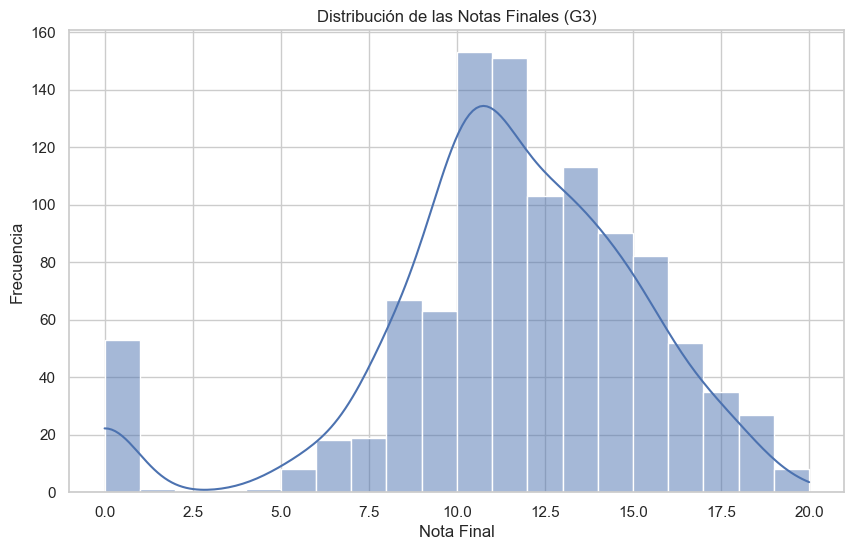

In [9]:
# Histograma de las notas finales (G3)
plt.figure(figsize=(10,6))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribución de las Notas Finales (G3)')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia')
plt.show()

***Análisis:***

- La distribución de las notas finales muestra una concentración en el rango de ***10 a 15 puntos***.

- Hay picos notables en las notas ***0***, ***10***, ***15***, y ***20***.

- Existe una cantidad significativa de estudiantes con nota ***0***, lo que podría indicar que abandonaron el curso o reprobaron.

- La distribución es ***bimodal***, con un pico en notas bajas y otro en notas medias-altas.


Esto sugiere que hay una polarización en el rendimiento académico, con grupos de estudiantes que tienen bajo rendimiento y otros con rendimiento medio a alto.

## 5.5. Análisis Bivariado
### 5.5.1. Relación entre `G3` y `G1`

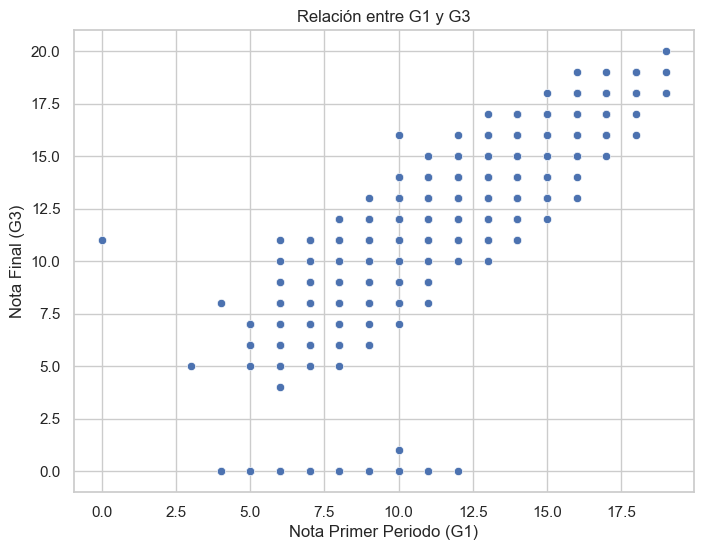

In [10]:
# Gráfico de dispersión entre G1 y G3
plt.figure(figsize=(8,6))
sns.scatterplot(x='G1', y='G3', data=data)
plt.title('Relación entre G1 y G3')
plt.xlabel('Nota Primer Periodo (G1)')
plt.ylabel('Nota Final (G3)')
plt.show()


***Análisis:***

- Existe una fuerte correlación positiva entre ***G1*** y ***G3***.
- Los estudiantes con altas notas en el primer periodo suelen mantener altas notas en el resultado final.
- Hay algunos casos donde estudiantes con notas altas en G1 terminan con notas bajas en G3, lo que podría deberse a circunstancias personales o académicas.

Esto indica que el desempeño inicial es un buen predictor del rendimiento final, pero no es el único factor.

### 5.5.2. Relación entre `G3` y `G2`

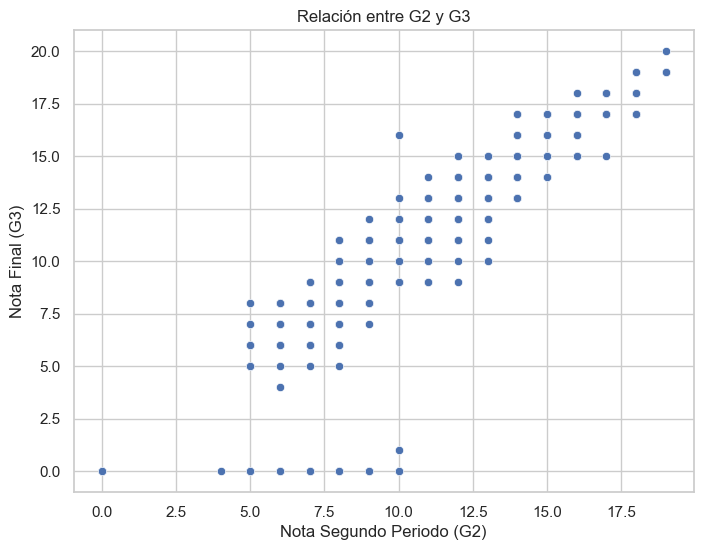

In [11]:
# Gráfico de dispersión entre G2 y G3
plt.figure(figsize=(8,6))
sns.scatterplot(x='G2', y='G3', data=data)
plt.title('Relación entre G2 y G3')
plt.xlabel('Nota Segundo Periodo (G2)')
plt.ylabel('Nota Final (G3)')
plt.show()

***Análisis:***

- La correlación entre `G2` y `G3` es aún más fuerte que entre `G1` y `G3`.
- Los estudiantes que mejoran o mantienen su rendimiento en el segundo periodo tienden a tener mejores notas finales.
- La mayoría de los puntos están cerca de la línea de identidad (`G2` = `G3`), lo que sugiere que las notas del segundo periodo son un excelente predictor de las notas finales.

### 5.5.3. Relación entre studytime y G3

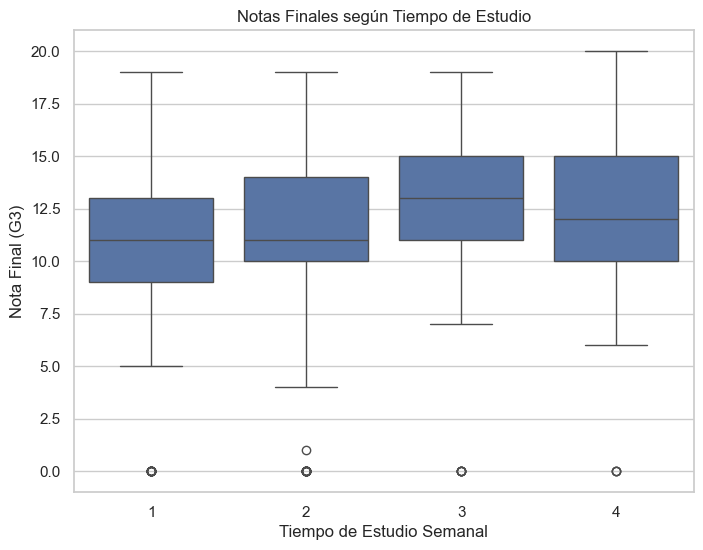

In [12]:
# Gráfico de caja de studytime vs G3
plt.figure(figsize=(8,6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title('Notas Finales según Tiempo de Estudio')
plt.xlabel('Tiempo de Estudio Semanal')
plt.ylabel('Nota Final (G3)')
plt.show()

***Análisis:***

- A medida que aumenta el tiempo de estudio semanal (`studytime`), la mediana de las notas finales también aumenta.
- Los estudiantes que estudian más de 10 horas semanales (`studytime = 4) tienen las notas finales más altas.
- Hay menos variabilidad en las notas de los estudiantes que dedican más tiempo al estudio.
- Esto confirma que el tiempo dedicado al estudio tiene un impacto positivo en el rendimiento académico.

## 5.6. Análisis de Valores Atípicos y Distribuciones
### 5.6.1. Distribución y Outliers en `absences`

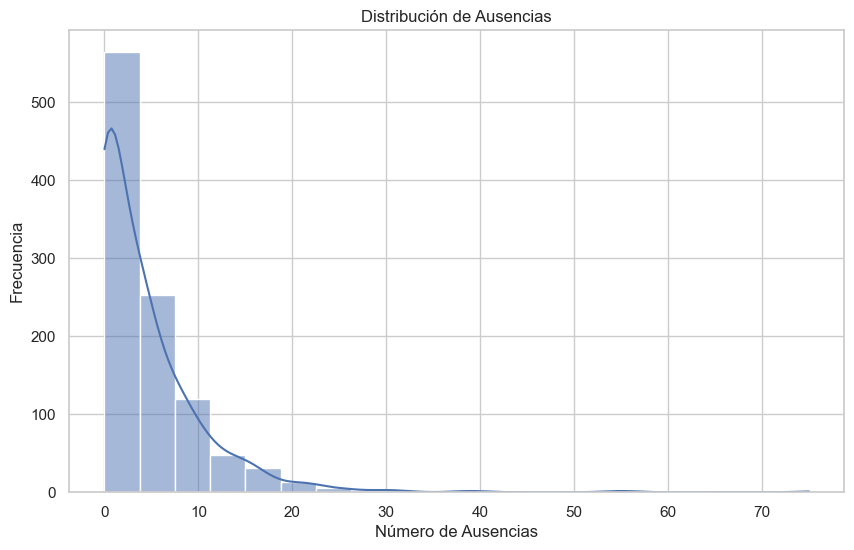

In [13]:
# Histograma de absences
plt.figure(figsize=(10,6))
sns.histplot(data['absences'], bins=20, kde=True)
plt.title('Distribución de Ausencias')
plt.xlabel('Número de Ausencias')
plt.ylabel('Frecuencia')
plt.show()

***Análisis:***

- La mayoría de los estudiantes tienen entre ***0 y 10 ausencias.***
- Hay una ***cola larga*** hacia la derecha, indicando la presencia de estudiantes con un número muy alto de ausencias.
- El valor máximo de 75 ausencias es muy alto y es probable que sea un outlier o error en los datos.

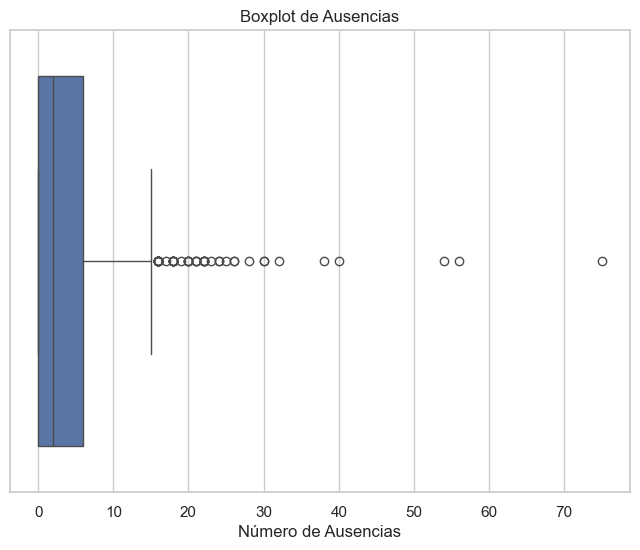

In [14]:
# Gráfico de caja de absences
plt.figure(figsize=(8,6))
sns.boxplot(x=data['absences'])
plt.title('Boxplot de Ausencias')
plt.xlabel('Número de Ausencias')
plt.show()


***Análisis:***

- El boxplot muestra varios outliers por encima del límite superior.
- Estos outliers podrían distorsionar el análisis y los modelos predictivos.
- Se podría considerar limitar los valores máximos de `absences` o transformarlos para reducir su impacto.

## 5.7. Matriz de Correlación
### 5.7.1. Seleccionar Variables Numéricas

In [15]:
# Ya hemos identificado las variables numéricas en numeric_cols
numeric_data = data[numeric_cols]

### 5.7.2. Calcular la Matriz de Correlación

In [16]:
corr_matrix = numeric_data.corr()

### 5.7.3. Visualizar la Matriz de Correlación

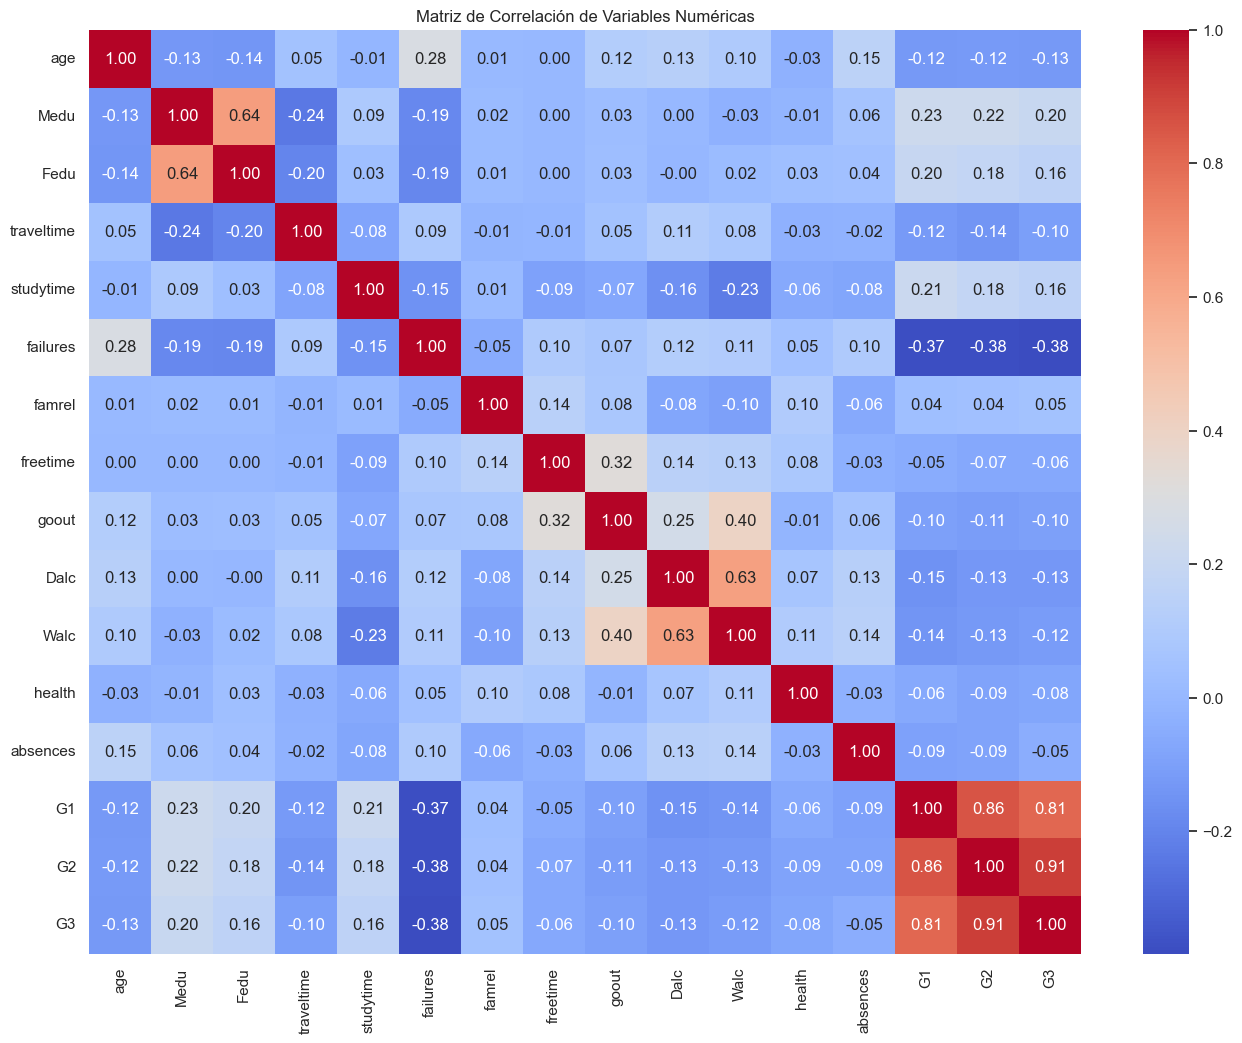

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

***Análisis:***

- Altas correlaciones positivas:
    - `G1` y `G3`: 0.81
    - `G2` y `G3`: 0.91
    - `G1` y `G2`: 0.86

- Correlaciones negativas:
    - `failures` y `G3`: -0.38, indicando que un mayor número de fracasos anteriores se asocia con notas finales más bajas.

- Bajas correlaciones:
    - `absences` y `G3: -0.06, sugiere que las ausencias no tienen una fuerte relación con las notas finales.
    - `studytime` y `G3: 0.16, una correlación positiva pero moderada.
- Consumo de alcohol:
    - `Dalc` y `G3`: -0.05
    - `Walc` y `G3`: -0.05
    - Estas correlaciones son bajas, indicando que el consumo de alcohol no está fuertemente relacionado con el rendimiento académico en este conjunto de datos.
        
***Conclusiones:***

- Las notas de los periodos anteriores (`G1`, `G2`) son los mejores predictores de la nota final (`G3`).
- La ***multicolinealidad*** entre `G1` y `G2` debe ser considerada al construir modelos, ya que pueden influir en los coeficientes y la interpretación.
- Variables como `failures` y `studytime` también aportan información valiosa y deben ser consideradas en el modelo.
- Otras variables numéricas muestran correlaciones bajas con `G3`, pero podrían interactuar con variables categóricas o tener efectos no lineales.

# Paso 6: Preprocesamiento de Datos

---

En este paso, prepararemos los datos para el modelado. Esto incluye la selección de características relevantes, el manejo de valores atípicos (outliers), la codificación de variables categóricas y el escalado de variables numéricas.

## 6.1. Selección de Características (Features)
Basándonos en el análisis exploratorio y la matriz de correlación que realizamos en el paso anterior, identificaremos las variables más relevantes para predecir la nota final `G3`.

***Variables numéricas relevantes:***

- `G1` y `G2`: Notas de los periodos anteriores, altamente correlacionadas con `G3`.
- `failures`: Número de fallos académicos anteriores, correlación negativa con `G3`.
- `studytime`: Tiempo de estudio semanal, correlación positiva moderada con `G3`.
- `absences`: Número de ausencias, aunque con baja correlación, podría ser relevante.
- `age`: Edad del estudiante, para ver si influye en el rendimiento.

***Variables categóricas relevantes:***

- `sex`: Sexo del estudiante.
- `address`: Tipo de residencia (urbana o rural).
- `famsize`: Tamaño de la familia.
- `Pstatus`: Estatus de convivencia de los padres.
- `schoolsup`: Apoyo educativo extra en la escuela.
- `famsup`: Apoyo educativo familiar.
- `paid`: Clases extras pagadas.
- `activities`: Participación en actividades extracurriculares.
- `internet`: Acceso a internet en casa.
- `romantic`: Si el estudiante está en una relación romántica.

### 6.1.1. Crear un DataFrame con las variables seleccionadas

In [18]:
# Lista de variables seleccionadas
selected_cols = ['G1', 'G2', 'failures', 'studytime', 'absences', 'age',
                 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                 'famsup', 'paid', 'activities', 'internet', 'romantic']

# Crear un nuevo DataFrame con las variables seleccionadas y 'G3', haciendo una copia
data_selected = data[selected_cols + ['G3']].copy()


Nota: Usamos `.copy()` para crear una copia independiente del DataFrame original y evitar el `SettingWithCopyWarning.


## 6.2. Manejo de Valores Atípicos (Outliers)

Observamos que la variable `absences` tiene valores atípicos que podrían afectar al modelo. Vamos a tratar estos valores para minimizar su impacto.

In [19]:
# Descripción estadística de 'absences'
print(data_selected['absences'].describe())

count    1044.000000
mean        4.434866
std         6.210017
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        75.000000
Name: absences, dtype: float64


***Análisis:***

- Media: 4.43 ausencias.
- Mediana: 2 ausencias.
- Percentil 75: 6 ausencias.
- Máximo: 75 ausencias.

El valor máximo de 75 es significativamente mayor que el percentil 75 (6), indicando la presencia de valores atípicos.

### 6.2.2. Limitar los Valores Atípicos
Para mitigar el efecto de los valores atípicos, limitaremos los valores de absences al percentil 95.

In [20]:
# Calcular el percentil 95 de 'absences'
absences_95 = data_selected['absences'].quantile(0.95)
print(f"Percentil 95 de 'absences': {absences_95}")


Percentil 95 de 'absences': 16.0


Ahora, limitamos los valores de absences al percentil 95 utilizando .loc:

In [21]:
# Limitar los valores de 'absences' al percentil 95
data_selected.loc[data_selected['absences'] > absences_95, 'absences'] = absences_95

### 6.2.3. Verificar la Distribución Después de Limitar

In [22]:
# Verificar que el máximo ahora es el percentil 95
print(f"Máximo de 'absences' después de limitar: {data_selected['absences'].max()}")

Máximo de 'absences' después de limitar: 16


## 6.3. Codificación de Variables Categóricas
Las variables categóricas deben ser convertidas a variables numéricas para ser utilizadas en los modelos.

### 6.3.1. Identificar Variables Categóricas

In [23]:
categorical_vars = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                    'famsup', 'paid', 'activities', 'internet', 'romantic']


### 6.3.2. Asegurar que las Variables Categóricas son de Tipo String y Normalizar
Antes de aplicar cualquier transformación, debemos asegurarnos de que las variables categóricas son de tipo string y no contienen valores nulos.

#### 6.3.2.1. Convertir Variables Categóricas a Tipo String

In [24]:
# Convertir las variables categóricas a tipo string
for var in categorical_vars:
    data_selected[var] = data_selected[var].astype(str)

#### 6.3.2.2. Normalizar las Cadenas en Variables Categóricas

In [25]:
# Normalizar las cadenas en variables categóricas
for var in categorical_vars:
    data_selected[var] = data_selected[var].str.strip().str.lower()

### 6.3.3. Verificar las Categorías Únicas

In [26]:
# Verificar las categorías únicas después de normalizar
for var in categorical_vars:
    print(f"{var}: {data_selected[var].unique()}")

sex: ['f' 'm']
address: ['u' 'r']
famsize: ['gt3' 'le3']
Pstatus: ['a' 't']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
internet: ['no' 'yes']
romantic: ['no' 'yes']


### 6.3.4. Crear el Diccionario de Mapeo

In [27]:
binary_mapping = {
    'f': 0, 'm': 1,
    'u': 1, 'r': 0,
    'le3': 0, 'gt3': 1,
    'a': 0, 't': 1,
    'yes': 1, 'no': 0
}

### 6.3.5. Aplicar el Mapeo a las Variables Categóricas

In [28]:
for var in categorical_vars:
    data_selected[var] = data_selected[var].map(binary_mapping)

### 6.3.6. Verificar Valores Nulos Después del Mapeo

In [29]:
print(data_selected[categorical_vars].isnull().sum())

sex           0
address       0
famsize       0
Pstatus       0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
dtype: int64


### 6.3.7. Manejar Valores Nulos en Variables Categóricas
#### 6.3.7.1. Identificar Filas con Valores Nulos

In [30]:
rows_with_nan = data_selected[categorical_vars].isnull().any(axis=1)
print(f"Número de filas con valores nulos: {rows_with_nan.sum()}")

Número de filas con valores nulos: 0


#### 6.3.7.2. Examinar las Filas con Valores Nulos

In [31]:
print(data_selected.loc[rows_with_nan, categorical_vars])

Empty DataFrame
Columns: [sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, internet, romantic]
Index: []


#### 6.3.7.3. Decidir Cómo Manejar los Valores Nulos
Opción 1: Eliminar las filas con valores nulos en variables categóricas.

In [32]:
data_selected = data_selected.dropna(subset=categorical_vars)

Opción 2: Imputar los valores nulos con el valor más frecuente (la moda).

In [33]:
for var in categorical_vars:
    data_selected[var].fillna(data_selected[var].mode()[0], inplace=True)

/var/folders/tm/mmfcvs7d7d15m9_lcl8l01hc0000gp/T/ipykernel_15324/3371307276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_selected[var].fillna(data_selected[var].mode()[0], inplace=True)
/var/folders/tm/mmfcvs7d7d15m9_lcl8l01hc0000gp/T/ipykernel_15324/3371307276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

### 6.3.8. Verificar Nuevamente los Valores Nulos

In [34]:
print(data_selected[categorical_vars].isnull().sum())

sex           0
address       0
famsize       0
Pstatus       0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
dtype: int64


## 6.4. División del Conjunto de Datos
Dividimos los datos en conjuntos de entrenamiento y prueba antes de escalar las variables numéricas.

### 6.4.1. Separar Variables Independientes y Dependiente

In [35]:
# Variables independientes
X = data_selected.drop('G3', axis=1)

# Variable dependiente
y = data_selected['G3']

### 6.4.2. Dividir en Conjuntos de Entrenamiento y Prueba

In [36]:
from sklearn.model_selection import train_test_split

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.5. Escalado de Variables Numéricas
Escalaremos las variables numéricas para que tengan media 0 y desviación estándar 1.

### 6.5.1. Identificar Variables Numéricas

In [37]:
numeric_vars = ['G1', 'G2', 'failures', 'studytime', 'absences', 'age']

### 6.5.2. Convertir Variables Numéricas a Tipo Float
Esto es necesario para evitar errores al asignar valores escalados (que son floats) a columnas de tipo int.

In [38]:
X_train[numeric_vars] = X_train[numeric_vars].astype(float)
X_test[numeric_vars] = X_test[numeric_vars].astype(float)

### 6.5.3. Escalar las Variables Numéricas

In [39]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia del escalador
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformar
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

# Transformar el conjunto de prueba
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])


## 6.6. Verificación Final del Preprocesamiento
### 6.6.1. Verificar los Tipos de Datos

In [40]:
print(X_train.dtypes)

G1            float64
G2            float64
failures      float64
studytime     float64
absences      float64
age           float64
sex             int64
address         int64
famsize         int64
Pstatus         int64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
internet        int64
romantic        int64
dtype: object


Se debería ver que las variables numéricas son de tipo `float64` y las variables categóricas son de tipo `float64` o `int64`.

### 6.6.2. Verificar que No Hay Valores Nulos

In [41]:
# Verificar valores nulos en X_train
print("Valores nulos en X_train:")
print(X_train.isnull().sum())

# Verificar valores nulos en X_test
print("\nValores nulos en X_test:")
print(X_test.isnull().sum())

Valores nulos en X_train:
G1            0
G2            0
failures      0
studytime     0
absences      0
age           0
sex           0
address       0
famsize       0
Pstatus       0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
dtype: int64

Valores nulos en X_test:
G1            0
G2            0
failures      0
studytime     0
absences      0
age           0
sex           0
address       0
famsize       0
Pstatus       0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
dtype: int64


### 6.6.3. Mostrar las Primeras Filas de X_train

In [42]:
print(X_train.head())

           G1        G2  failures  studytime  absences       age  sex  \
531 -0.750328 -0.702440 -0.378483  -1.146393 -0.016595 -0.585112    1   
256  0.923974  0.212119 -0.378483   2.416529  0.416421  0.234634    0   
350 -1.085188 -1.312146  4.315080   0.041247  0.849437  1.874125    1   
60  -0.415467 -0.092734 -0.378483   0.041247  0.416421 -0.585112    0   
930 -0.750328 -0.092734 -0.378483   0.041247  1.498960 -1.404857    1   

     address  famsize  Pstatus  schoolsup  famsup  paid  activities  internet  \
531        1        1        1          0       0     0           0         0   
256        1        0        1          0       1     1           1         1   
350        0        1        1          0       0     0           0         1   
60         0        1        1          0       1     0           1         0   
930        0        1        1          0       1     0           1         0   

     romantic  
531         0  
256         0  
350         0  
60        

# 3. Entrenamiento y Evaluación del Modelo
En este paso, utilizaremos los datos preprocesados para entrenar modelos de aprendizaje automático que puedan predecir la nota final `G3 de los estudiantes. También evaluaremos el desempeño de los modelos utilizando métricas apropiadas.

## 3.1. Definir el Problema de Aprendizaje
Nuestro objetivo es predecir una variable numérica continua (`G3), por lo que estamos ante un problema de regresión.

## 3.2. Seleccionar Modelos a Utilizar
Probaremos varios algoritmos de regresión para determinar cuál ofrece el mejor desempeño:

- Regresión Lineal
- Árboles de Decisión
- Bosques Aleatorios (Random Forest)
- Gradient Boosting (XGBoost)
- Máquinas de Soporte Vectorial (SVR)

## 3.3. Entrenar y Evaluar Modelos
Para cada modelo, seguiremos estos pasos:

1. Entrenar el modelo utilizando el conjunto de entrenamiento (`X_train`, `y_train`).
2. Realizar predicciones en el conjunto de prueba (`X_test).
3. Evaluar el desempeño del modelo utilizando métricas como el Error Absoluto Medio (MAE), el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²).

### 3.3.1. Importar Librerías Necesarias

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

### 3.3.2. Definir una Función para Evaluar Modelos
Para simplificar el proceso, crearemos una función que entrene y evalúe un modelo dado.

In [44]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas de desempeño
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir los resultados
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}")
    
    # Retornar las predicciones para análisis adicional si es necesario
    return y_pred

### 3.3.3. Regresión Lineal
#### 3.3.3.1. Entrenar y Evaluar el Modelo

In [45]:
# Crear una instancia del modelo
linear_model = LinearRegression()

# Entrenar y evaluar
print("Resultados de Regresión Lineal:")
y_pred_lr = train_and_evaluate(linear_model, X_train, y_train, X_test, y_test)

Resultados de Regresión Lineal:
MAE: 0.98
MSE: 2.94
RMSE: 1.72
R^2: 0.81


***Análisis:***
- MAE (Error Absoluto Medio): Indica en promedio cuánto difieren las predicciones de los valores reales.
- MSE (Error Cuadrático Medio): Penaliza más los errores grandes.
- RMSE (Raíz del Error Cuadrático Medio): Es interpretable en las mismas unidades que la variable objetivo.
- R² (Coeficiente de Determinación): Indica qué proporción de la variabilidad en la variable objetivo es explicada por el modelo.

Estos resultados sugieren que el modelo tiene un desempeño razonable con un error moderado y una capacidad decente para explicar la variabilidad de los datos.

### 3.3.4. Árbol de Decisión
#### 3.3.4.1. Entrenar y Evaluar el Modelo

In [46]:
# Crear una instancia del modelo
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar y evaluar
print("\nResultados de Árbol de Decisión:")
y_pred_tree = train_and_evaluate(tree_model, X_train, y_train, X_test, y_test)


Resultados de Árbol de Decisión:
MAE: 1.16
MSE: 5.12
RMSE: 2.26
R^2: 0.67


***Análisis:***
- Compara las métricas con las obtenidas por la regresión lineal.
- Los árboles de decisión pueden capturar relaciones no lineales entre las variables.

### 3.3.5. Bosques Aleatorios (Random Forest)
#### 3.3.5.1. Entrenar y Evaluar el Modelo

In [47]:
# Crear una instancia del modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar y evaluar
print("\nResultados de Bosque Aleatorio:")
y_pred_rf = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)



Resultados de Bosque Aleatorio:
MAE: 1.02
MSE: 3.12
RMSE: 1.77
R^2: 0.80


***Análisis:***

Los bosques aleatorios suelen mejorar el desempeño al reducir el sobreajuste de los árboles individuales.

### 3.3.6. Gradient Boosting (XGBoost)
#### 3.3.6.1. Entrenar y Evaluar el Modelo

In [48]:
import xgboost as xgb
# Crear una instancia del modelo
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Entrenar y evaluar
print("\nResultados de XGBoost:")
y_pred_xgb = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)



Resultados de XGBoost:
MAE: 1.09
MSE: 3.06
RMSE: 1.75
R^2: 0.80


***Análisis:***

- XGBoost es potente para capturar relaciones complejas.
- Compara las métricas con los modelos anteriores.

### 3.3.7. Máquina de Soporte Vectorial (SVR)
### 3.3.7.1. Entrenar y Evaluar el Modelo

In [49]:
# Crear una instancia del modelo
svr_model = SVR(kernel='rbf')

# Entrenar y evaluar
print("\nResultados de SVR:")
y_pred_svr = train_and_evaluate(svr_model, X_train, y_train, X_test, y_test)


Resultados de SVR:
MAE: 1.09
MSE: 3.63
RMSE: 1.90
R^2: 0.77


***Análisis:***

Las SVR pueden ser efectivas, pero también son sensibles a la escala de los datos.

## 7.4. Comparación de Modelos
Recopilar las métricas de desempeño de todos los modelos para compararlos directamente.

In [50]:
from sklearn.metrics import root_mean_squared_error

# Crear un DataFrame con las métricas
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Bosque Aleatorio', 'XGBoost', 'SVR'],
    'MAE': [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_tree),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb),
            mean_absolute_error(y_test, y_pred_svr)],
    'RMSE': [root_mean_squared_error(y_test, y_pred_lr),
             root_mean_squared_error(y_test, y_pred_tree),
             root_mean_squared_error(y_test, y_pred_rf),
             root_mean_squared_error(y_test, y_pred_xgb),
             root_mean_squared_error(y_test, y_pred_svr)],
    'R2': [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_tree),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_xgb),
           r2_score(y_test, y_pred_svr)]
})
print("\nComparación de Modelos:")
print(results)


Comparación de Modelos:
              Modelo       MAE      RMSE        R2
0   Regresión Lineal  0.980145  1.715018  0.809759
1  Árbol de Decisión  1.162679  2.263714  0.668556
2   Bosque Aleatorio  1.021460  1.765974  0.798286
3            XGBoost  1.090844  1.749810  0.801962
4                SVR  1.091092  1.904361  0.765433


***Análisis:***

- Modelo con menor MAE y RMSE: Indica mejor precisión en las predicciones.
- Modelo con mayor R²: Explica mejor la variabilidad de la variable objetivo.

## 3.5. Interpretación y Análisis de Resultados
### 3.5.1. Importancia de las Variables
Para modelos basados en árboles (como Random Forest y XGBoost), podemos extraer la importancia de las variables.

#### 3.5.1.1. Importancia en el Bosque Aleatorio

In [51]:
# Obtener importancias
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear un DataFrame
feat_importance = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})

# Ordenar por importancia
feat_importance = feat_importance.sort_values(by='Importancia', ascending=False)

# Mostrar las importancias
print("\nImportancia de las Variables (Random Forest):")
print(feat_importance)


Importancia de las Variables (Random Forest):
      Variable  Importancia
1           G2     0.828417
4     absences     0.064898
0           G1     0.018747
3    studytime     0.016935
5          age     0.014981
6          sex     0.008000
2     failures     0.006784
10   schoolsup     0.006039
13  activities     0.005802
12        paid     0.005639
11      famsup     0.005184
8      famsize     0.004790
15    romantic     0.004506
7      address     0.004198
14    internet     0.003137
9      Pstatus     0.001945


#### 3.5.1.2. Visualizar la Importancia

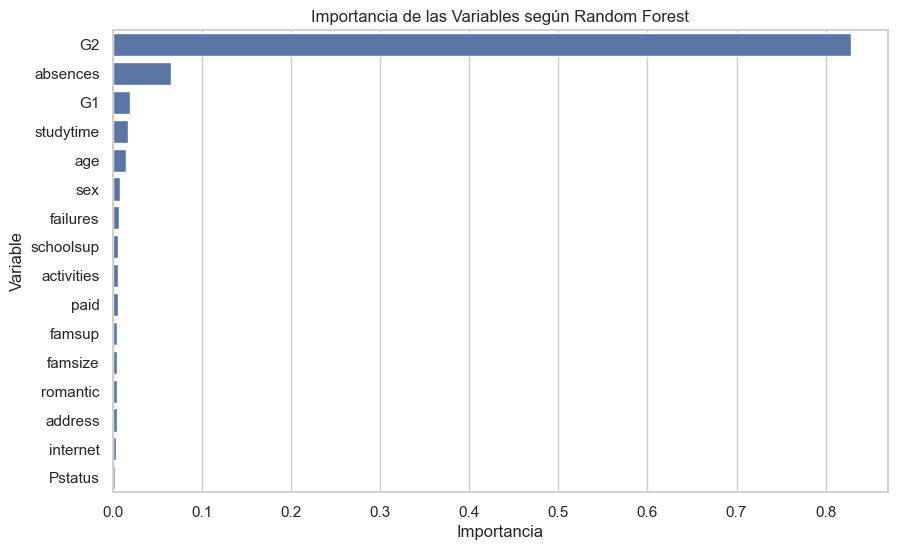

In [52]:
# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=feat_importance)
plt.title('Importancia de las Variables según Random Forest')
plt.show()

from sklearn.model_selection import GridSearchCV
## 3.6. Ajuste de Hiperparámetros
Para mejorar el desempeño del modelo, podemos ajustar los hiperparámetros utilizando técnicas como Grid Search o Random Search.

### 3.6.1. Grid Search con Random Forest

#### 3.6.1.1. Importar GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

#### 3.6.1.2. Definir el Espacio de Búsqueda

In [54]:
# Definir los parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#### 3.6.1.3. Configurar GridSearchCV

In [55]:
# Crear una instancia de RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

#### 3.6.1.4. Ejecutar Grid Search

In [56]:
# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error')

#### 3.6.1.5. Mejor Modelo y Parámetros Óptimos

In [57]:
# Mejor modelo
best_rf = grid_search.best_estimator_

# Parámetros óptimos
print("\nMejores Parámetros Encontrados:")
print(grid_search.best_params_)


Mejores Parámetros Encontrados:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


#### 3.6.1.6. Evaluar el Modelo Optimizado

In [58]:
# Entrenar y evaluar el mejor modelo
print("\nResultados del Bosque Aleatorio Optimizado:")
y_pred_best_rf = train_and_evaluate(best_rf, X_train, y_train, X_test, y_test)


Resultados del Bosque Aleatorio Optimizado:
MAE: 0.91
MSE: 2.75
RMSE: 1.66
R^2: 0.82


# 4. Implementación y Uso del Modelo para Predicción
En este paso, nos enfocaremos en cómo utilizar este modelo para predecir la nota final G3 de los estudiantes, tanto en el conjunto de prueba como en nuevos datos.

---
## 4.1. Resumen del Modelo Seleccionado
El modelo de Regresión Lineal fue entrenado utilizando las variables preprocesadas y mostró las mejores métricas de desempeño. Ahora, lo utilizaremos para realizar predicciones y analizar los resultados.

## 4.2. Entrenar el Modelo con Todos los Datos Disponibles
Para aprovechar toda la información disponible, es recomendable reentrenar el modelo utilizando tanto el conjunto de entrenamiento como el de prueba.
### 4.2.1. Combinar Conjuntos de Datos

In [59]:
# Combinar X_train y X_test
X_full = pd.concat([X_train, X_test], axis=0)

# Combinar y_train y y_test
y_full = pd.concat([y_train, y_test], axis=0)

### 4.2.2. Reentrenar el Modelo de Regresión Lineal

In [60]:
# Crear una nueva instancia del modelo
final_model = LinearRegression()

# Entrenar el modelo con todos los datos
final_model.fit(X_full, y_full)

LinearRegression()

## 4.3. Uso del Modelo para Predicciones
### 4.3.1. Predicción en Datos Existentes
Podemos utilizar el modelo para predecir G3 en los datos que ya tenemos y analizar las predicciones.

In [61]:
# Realizar predicciones en X_full
y_pred_full = final_model.predict(X_full)

# Crear un DataFrame con los resultados
results_df = X_full.copy()
results_df['G3_real'] = y_full
results_df['G3_predicho'] = y_pred_full

# Mostrar las primeras filas
print(results_df[['G3_real', 'G3_predicho']].head())

     G3_real  G3_predicho
531       11     9.091388
256       13    12.247785
350        8     6.296219
60        11    11.306490
930       10    11.431176


***Análisis:***

- Compara las notas reales con las predichas.
- Calcula las métricas de desempeño nuevamente si es necesario.

### 4.3.2. Predicción en Nuevos Datos
#### 4.3.2.1. Preparar Nuevos Datos
Para utilizar el modelo de predicción, se debe preprocesar los nuevos datos de la misma manera que se hizo con los datos de entrenamiento.

Pasos:

1. Cargar los nuevos datos:

In [62]:
# Supongamos que los nuevos datos están en un archivo CSV
new_data = pd.read_csv('ruta_a_nuevos_datos.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ruta_a_nuevos_datos.csv'

2. Seleccionar las mismas características:

In [ ]:
new_data_selected = new_data[selected_cols].copy()

3. Manejar los valores atípicos en absences:

In [ ]:
# Limitar 'absences' al percentil 95 calculado anteriormente (16.0)
new_data_selected.loc[new_data_selected['absences'] > absences_95, 'absences'] = absences_95

4. Convertir variables categóricas a string y normalizar:

In [ ]:
for var in categorical_vars:
    new_data_selected[var] = new_data_selected[var].astype(str).str.strip().str.lower()

5. Mapear las variables categóricas:

In [ ]:
for var in categorical_vars:
    new_data_selected[var] = new_data_selected[var].map(binary_mapping)

6. Manejar valores nulos si los hay:

In [ ]:
# Imputar o eliminar filas con valores nulos
new_data_selected = new_data_selected.dropna()

7. Convertir variables numéricas a float:

In [ ]:
new_data_selected[numeric_vars] = new_data_selected[numeric_vars].astype(float)

8. Escalar las variables numéricas:

Importante: Se debe usar el mismo escalador (scaler) que utilizamos con los datos de entrenamiento.

In [ ]:
# Escalar variables numéricas
new_data_selected[numeric_vars] = scaler.transform(new_data_selected[numeric_vars])

### 4.3.2.2. Realizar Predicciones en los Nuevos Datos

In [ ]:
# Realizar predicciones
new_predictions = final_model.predict(new_data_selected)

# Añadir las predicciones al DataFrame
new_data_selected['G3_predicho'] = new_predictions

# Mostrar las primeras filas
print(new_data_selected[['G3_predicho']].head())

- Ahora se tienen las predicciones de G3 para los nuevos estudiantes.

Se puede utilizar esta información para tomar decisiones o realizar análisis adicionales.